In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
#reading the data
df = pd.read_csv('gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [140]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [141]:
df.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

In [142]:
#creating a list for categorical and numericals variables
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['Gender', 'Workout_Type']

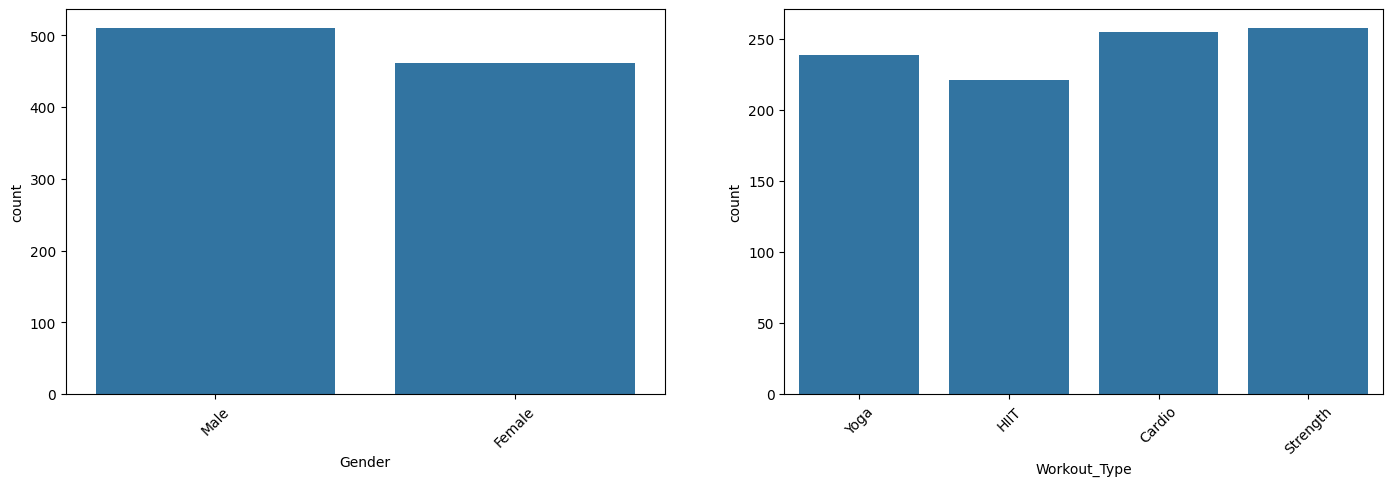

In [143]:
#Checking the distribution of categorical variables (count of each category)
fig = plt.figure(figsize=(17,5))
for i,col in enumerate(cat_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
plt.subplots_adjust(hspace=1.8)

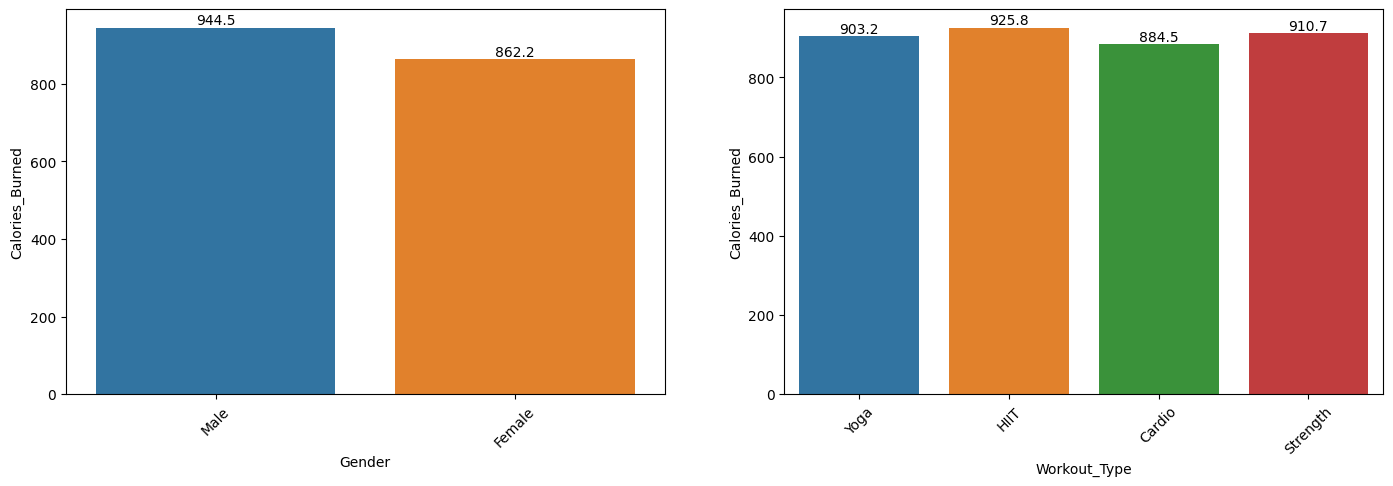

In [131]:
#Checking the distribution of Calories_Burned across the categorical variables
fig = plt.figure(figsize=(17,5))
for i,col in enumerate(cat_cols):
    plt.subplot(1,2,i+1)
    ax = sns.barplot(x=col, y='Calories_Burned', data=df, hue=col, errorbar=None)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    plt.xticks(rotation=45)
plt.subplots_adjust(hspace=1.8)

In [132]:
#Checking the distribution of each numerical variable
def plot_num_distribution(df):
    fig = plt.figure(figsize=(15,10))
    for i,col in enumerate(num_cols):
        plt.subplot(4,4,i+1)
        sns.histplot(df[col],kde=True)
        plt.title(f'{col}')
        plt.xticks(rotation=45)
    plt.subplots_adjust(hspace=1.8)

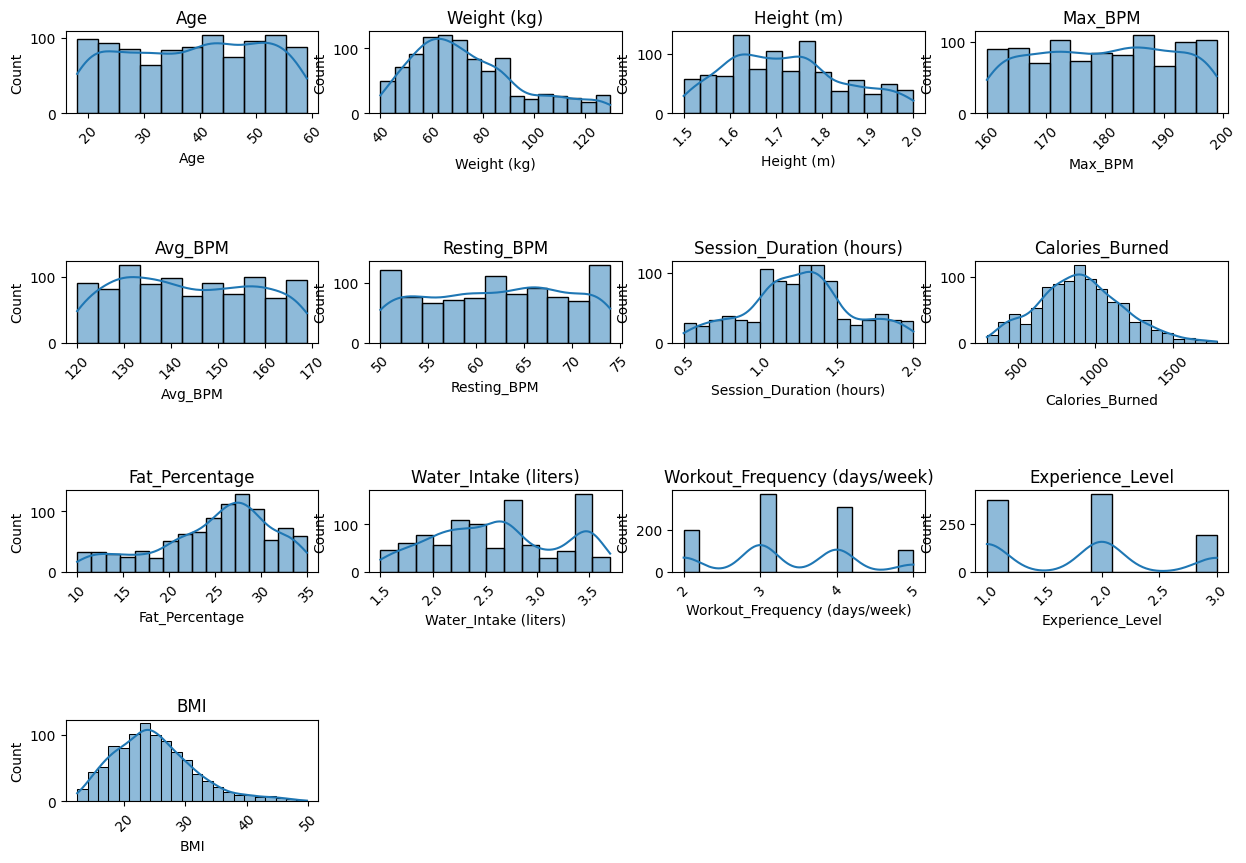

In [133]:
plot_num_distribution(df)

In [19]:
def test_skewness(df):
    from scipy import stats
    for col in num_cols:
        skewness = stats.skew(df[col])
        if skewness < -1 or skewness > 1:
            print(f"{col} is Skewed ({skewness:.2f})")
        else:
            print(f"{col} is not Skewed ({skewness:.2f})")

In [20]:
test_skewness(df)

Age is not Skewed (-0.08)
Weight (kg) is not Skewed (0.77)
Height (m) is not Skewed (0.34)
Max_BPM is not Skewed (-0.04)
Avg_BPM is not Skewed (0.09)
Resting_BPM is not Skewed (-0.07)
Session_Duration (hours) is not Skewed (0.03)
Calories_Burned is not Skewed (0.28)
Fat_Percentage is not Skewed (-0.63)
Water_Intake (liters) is not Skewed (0.07)
Workout_Frequency (days/week) is not Skewed (0.15)
Experience_Level is not Skewed (0.32)
BMI is not Skewed (0.76)


In [21]:
def plot_box_plot(df):
    plt.figure(figsize=(15,10))
    for i,val in enumerate(num_cols):
        plt.subplot(6,6,i+1)
        sns.boxplot(x=val,data=df)
        plt.title(f'{val}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

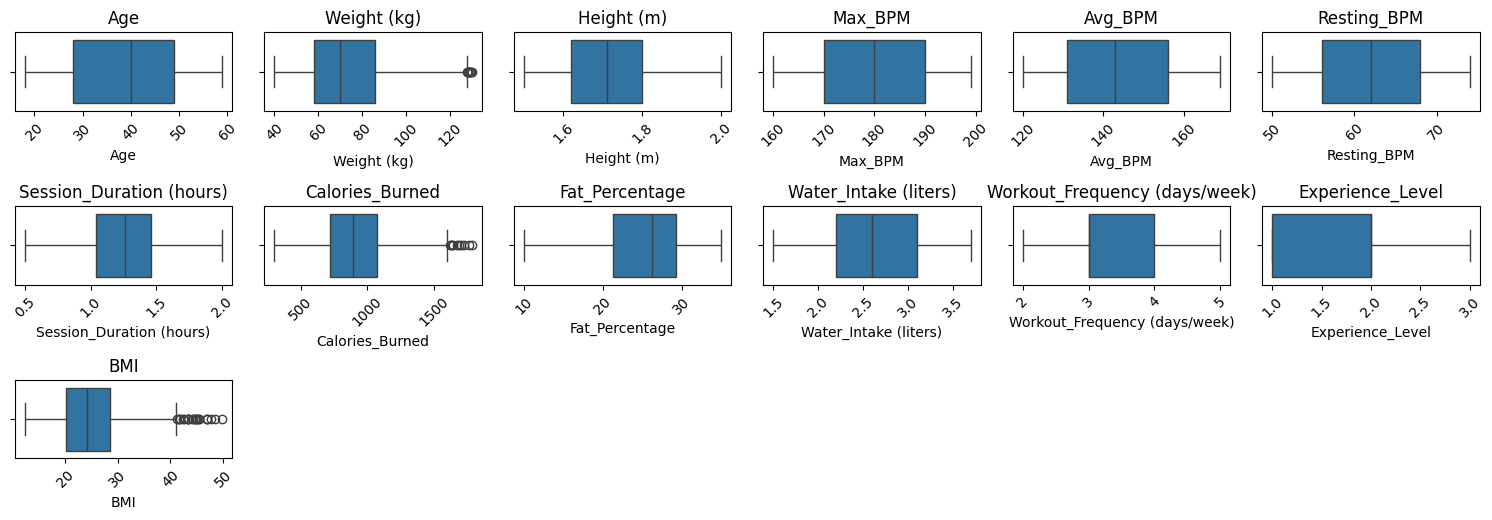

In [22]:
plot_box_plot(df)

In [144]:
#function to extract the outliers using the IQR
def extract_outliers(df):
    outliers_dict = {}
    
    for col in num_cols:
        lower_quartile = df[col].quantile(0.25)
        upper_quartile = df[col].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_bound = lower_quartile - 1.5 * IQR
        upper_bound = upper_quartile + 1.5 * IQR
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers_in_col
        #print(f"Outliers in {col}:")
        #print(outliers_in_col)
        #print(f"Number of outliers in {col}: {len(outliers_in_col)}\n")
    
    return outliers_dict

In [145]:
print(df['Calories_Burned'].max())

1783.0


In [146]:
outliers_data = extract_outliers(df)
calories_outliers = outliers_data['Calories_Burned']
calories_outliers

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
90,25,Male,81.5,1.61,170,159,63,1.93,1688.0,HIIT,10.9,3.5,4,3,31.44
99,24,Female,60.1,1.79,170,165,63,1.97,1625.0,Cardio,15.9,2.7,4,3,18.76
124,26,Male,86.2,1.68,189,157,72,1.97,1701.0,Strength,13.3,3.5,5,3,30.54
475,27,Male,89.3,1.64,192,162,64,1.82,1622.0,HIIT,12.1,3.5,4,3,33.20
511,39,Male,86.2,1.82,191,160,72,1.96,1725.0,Strength,10.2,3.5,5,3,26.02
572,36,Male,88.0,1.71,185,160,73,1.87,1646.0,HIIT,12.0,3.5,5,3,30.09
646,22,Male,88.5,1.62,174,162,69,1.88,1675.0,Strength,10.7,3.5,5,3,33.72
712,19,Male,82.4,1.96,174,169,62,1.90,1766.0,HIIT,10.1,3.5,5,3,21.45
728,47,Male,87.2,1.64,177,165,50,2.00,1634.0,Strength,15.0,3.5,4,3,32.42
910,32,Male,89.8,1.92,199,168,67,1.93,1783.0,Strength,10.6,3.5,4,3,24.36


In [147]:
df = df[~df['Calories_Burned'].isin(calories_outliers['Calories_Burned'])]

In [148]:
print(df['Calories_Burned'].max())

1598.0


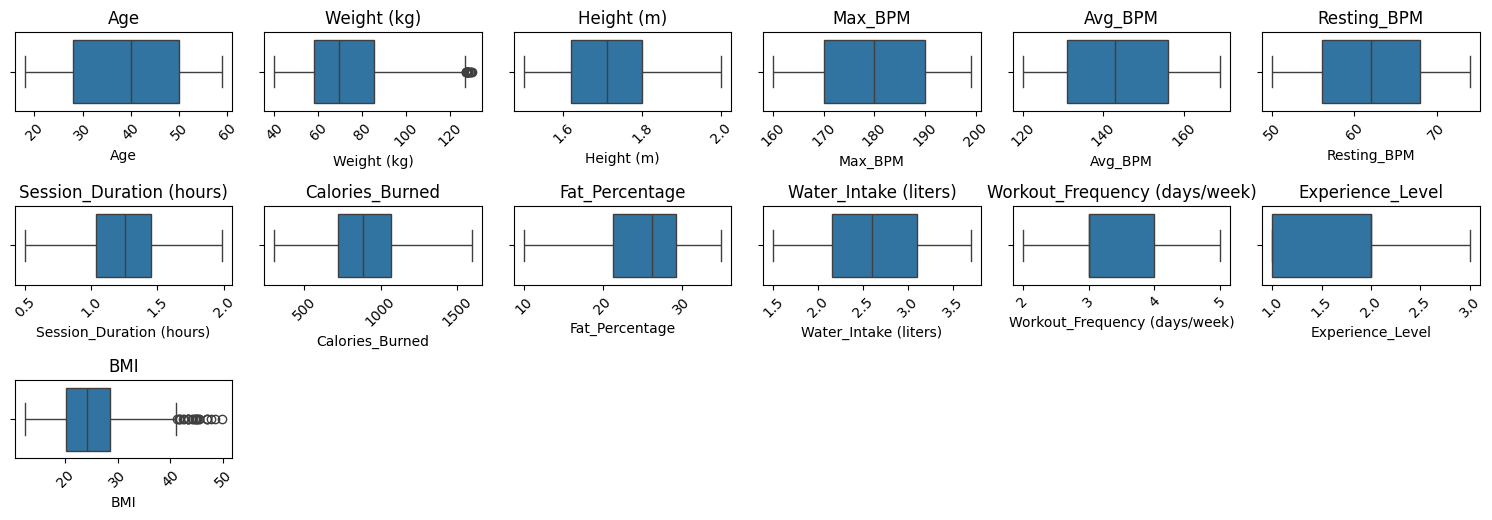

In [34]:
plot_box_plot(df)

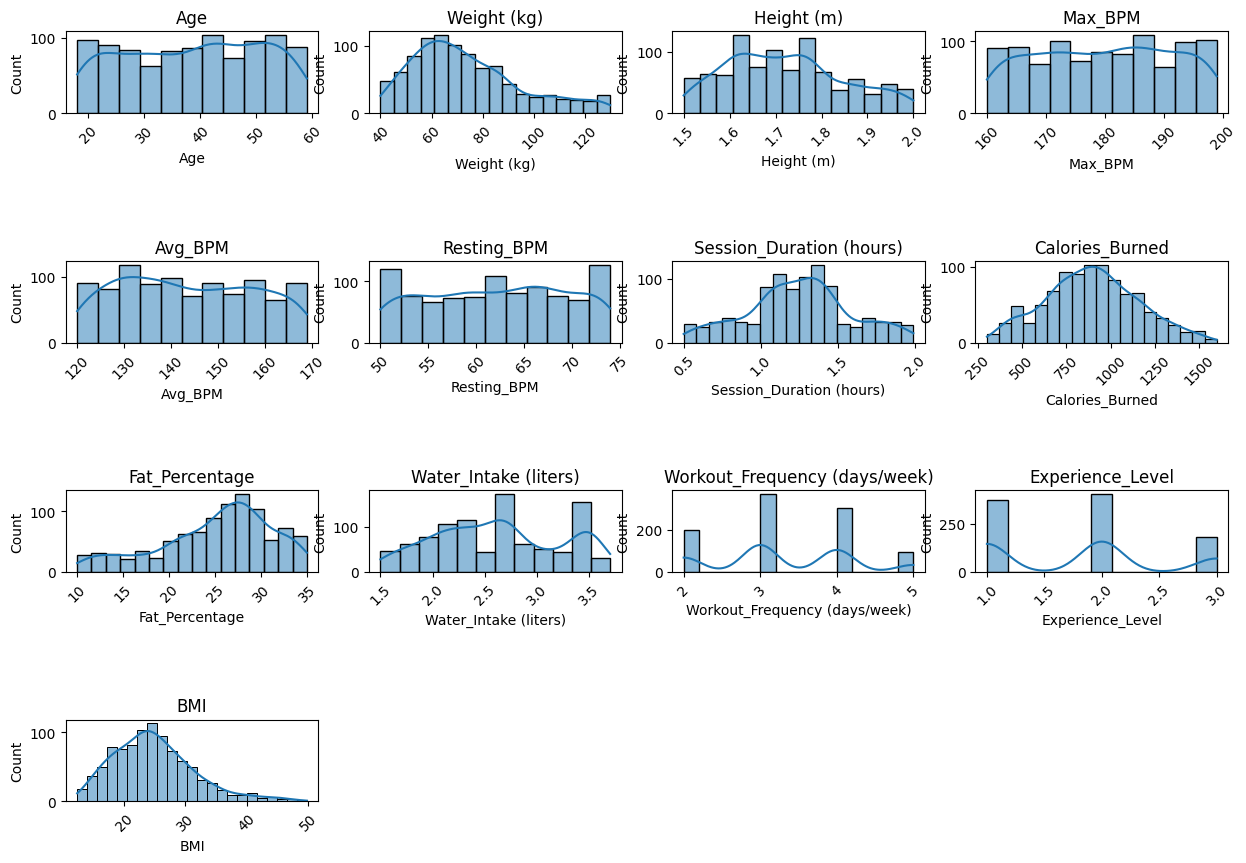

In [29]:
#checking for the distribution after outliers removal
plot_num_distribution(df)

# performing Priori power analysis to determine the sample size needed

In [30]:
from statsmodels.stats.power import FTestAnovaPower

# Define parameters
effect_size = 0.5  # Small to medium effect size (Cohen's f)
alpha = 0.05       # Significance level
power = 0.85      # Desired power (95%)
k = 4             # Number of groups

# Compute required sample size
analysis = FTestAnovaPower()
required_n = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, k_groups=k)

print(f"Required total sample size: {round(required_n)}")

Required total sample size: 53


In [31]:
from scipy import stats
def normal_test(df):
    for col in num_cols:
        stat, p = stats.normaltest(df[col])
        if p < 0.05:
            print(f"{col} distribution is not Normal")
        else:
            print(f"{col} distribution is normal")

In [32]:
#checking for normality after outliers removal
normal_test(df)

Age distribution is not Normal
Weight (kg) distribution is not Normal
Height (m) distribution is not Normal
Max_BPM distribution is not Normal
Avg_BPM distribution is not Normal
Resting_BPM distribution is not Normal
Session_Duration (hours) distribution is normal
Calories_Burned distribution is not Normal
Fat_Percentage distribution is not Normal
Water_Intake (liters) distribution is not Normal
Workout_Frequency (days/week) distribution is not Normal
Experience_Level distribution is not Normal
BMI distribution is not Normal


In [35]:
def levene_test(df):
    for col in cat_cols:
        groups = [group['Calories_Burned'].values for _, group in df.groupby(col)]
        stat, p = stats.levene(*groups)
        if p < 0.05:
            print(f"Levene's Test: Variances of Calories_Burned are significantly different across the {col} (Reject H0)")
        else:
            print(f"Levene's Test: Variances of Calories_Burned are equal across the {col} (Fail to reject H0)")

In [36]:
levene_test(df)

Levene's Test: Variances of Calories_Burned are significantly different across the Gender (Reject H0)
Levene's Test: Variances of Calories_Burned are equal across the Workout_Type (Fail to reject H0)


In [134]:
print(df['Calories_Burned'].min())

303.0


In [38]:
df_transformed = df.copy()
for col in num_cols:
    if (df_transformed[col] <= 0).any():
        df_transformed[col] = np.log(df_transformed[col] + 1)
    else:
        df_transformed[col] = np.log(df_transformed[col])

In [39]:
df_transformed.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,4.025352,Male,4.480740,0.536493,5.192957,5.056246,4.094345,0.524729,7.180070,Yoga,2.533697,1.252763,1.386294,1.098612,3.407842
1,3.828641,Female,4.316154,0.425268,5.187386,5.017280,4.189655,0.262364,6.783325,HIIT,3.523415,0.741937,1.386294,0.693147,3.465736
2,3.465736,Female,4.220977,0.506818,5.117994,4.804021,3.988984,0.104360,6.517671,Cardio,3.508556,0.832909,1.386294,0.693147,3.207208
3,3.218876,Male,3.974058,0.530628,5.247024,5.099866,4.025352,-0.527633,6.276643,Strength,3.360375,0.741937,1.098612,0.000000,2.912894
4,3.637586,Male,3.830813,0.582216,5.236442,5.062595,4.219508,-0.446287,6.320768,Strength,3.374169,1.029619,1.098612,0.000000,2.666534


In [40]:
normal_test(df_transformed)

Age distribution is not Normal
Weight (kg) distribution is not Normal
Height (m) distribution is not Normal
Max_BPM distribution is not Normal
Avg_BPM distribution is not Normal
Resting_BPM distribution is not Normal
Session_Duration (hours) distribution is not Normal
Calories_Burned distribution is not Normal
Fat_Percentage distribution is not Normal
Water_Intake (liters) distribution is not Normal
Workout_Frequency (days/week) distribution is not Normal
Experience_Level distribution is not Normal
BMI distribution is normal


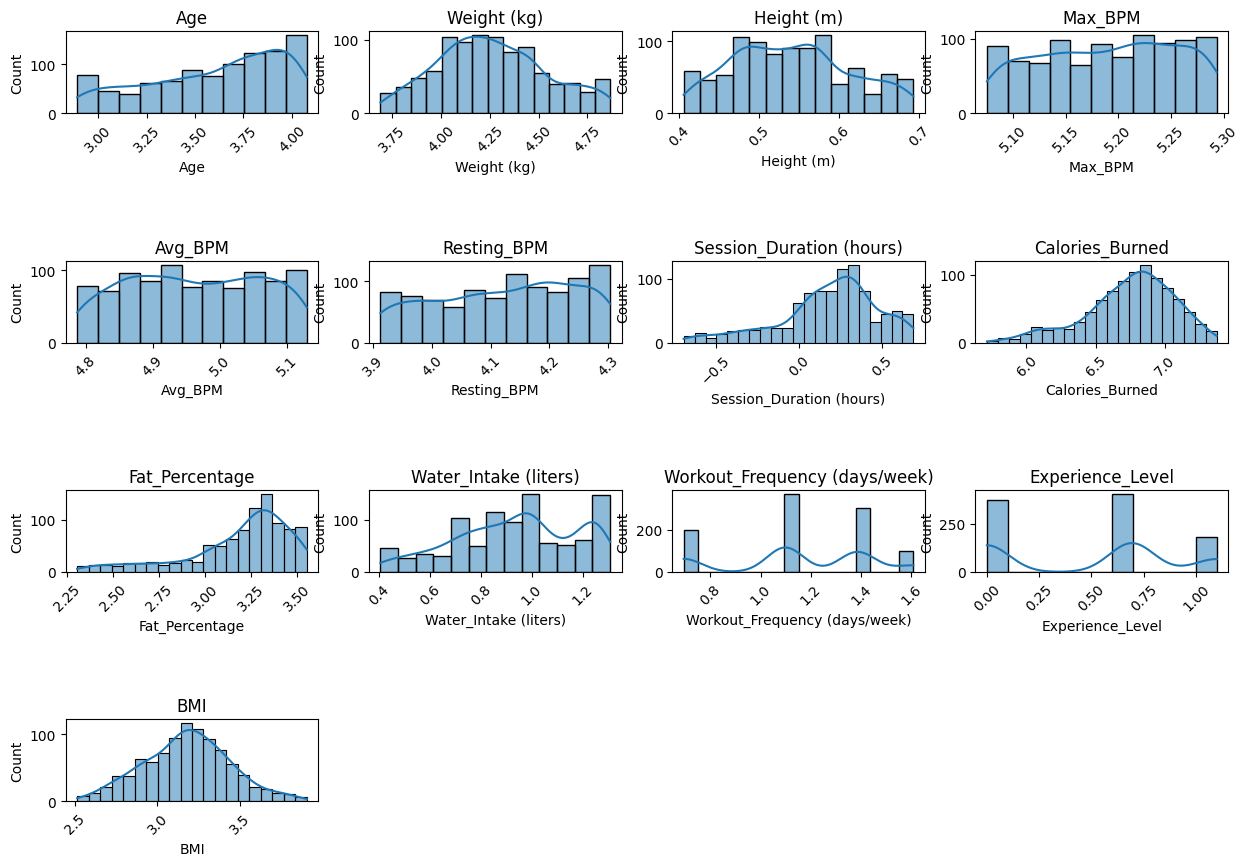

In [41]:
plot_num_distribution(df_transformed)

# the calories burned data does not follow a normal distribution. However, variances of calories burned across different work type is the same. for that reason, we will use a parametric test even though the distribution is not normal. the sample size is large enough

In [149]:
df[num_cols].corr()['Calories_Burned']

Age                             -0.139237
Weight (kg)                      0.084963
Height (m)                       0.085215
Max_BPM                         -0.004423
Avg_BPM                          0.316916
Resting_BPM                      0.002861
Session_Duration (hours)         0.907301
Calories_Burned                  1.000000
Fat_Percentage                  -0.573462
Water_Intake (liters)            0.335131
Workout_Frequency (days/week)    0.567836
Experience_Level                 0.685114
BMI                              0.047950
Name: Calories_Burned, dtype: float64

In [150]:
spearman_corr = df[num_cols].corr(method='spearman')
spearman_corr_target = spearman_corr['Calories_Burned'].sort_values(ascending=False)
print(spearman_corr_target)

Calories_Burned                  1.000000
Session_Duration (hours)         0.900693
Experience_Level                 0.648407
Workout_Frequency (days/week)    0.532664
Water_Intake (liters)            0.330387
Avg_BPM                          0.322141
Weight (kg)                      0.121494
Height (m)                       0.074560
BMI                              0.063693
Resting_BPM                     -0.010593
Max_BPM                         -0.011208
Age                             -0.142511
Fat_Percentage                  -0.491362
Name: Calories_Burned, dtype: float64


In [151]:
#performing parametric Anova
import scipy.stats as stats
from statsmodels.stats.power import FTestAnovaPower

def perform_anova(df,variable):
    unique_groups = df[variable].unique()
    margin_groups = [df[df[variable] == unique_group]['Calories_Burned'] for unique_group in unique_groups]
    stat2, p2 = stats.f_oneway(*margin_groups)
    if p2 < 0.05:
        print(f"ANOVA result: p-value = {p2}. There are significant differences between {variable}s")
    else:
        print(f"ANOVA result: p-value = {p2}. There are no significant differences between {variable}s")

In [152]:
perform_anova(df,'Workout_Type')

ANOVA result: p-value = 0.6321039045958793. There are no significant differences between Workout_Types


In [153]:
alpha = 0.05
unique_groups = df['Workout_Type'].unique()
margin_groups = [df[df['Workout_Type'] == unique_group]['Calories_Burned'] for unique_group in unique_groups]
sample_size = min([len(group) for group in margin_groups])
num_groups = len(margin_groups)

def compute_cohens_f(groups):
    group_means = np.array([np.mean(group) for group in margin_groups])
    grand_mean = np.mean(np.concatenate(margin_groups))
    s_between = np.sum((group_means - grand_mean) ** 2) / len(group_means)
    s_within = np.mean([np.var(group, ddof=1) for group in margin_groups])
    return np.sqrt(s_between / s_within)

In [154]:
# Compute effect size
cohens_f = compute_cohens_f(margin_groups)
power_analysis = FTestAnovaPower()
power = power_analysis.power(effect_size=cohens_f, nobs=sample_size * num_groups, alpha=alpha, k_groups=num_groups)

print(f"Statistical Power: {power:.4f}")

# Interpretation
if power >= 0.8:
    print("The test has adequate power (≥ 80%) to detect significant differences.")
else:
    print("The test may lack sufficient power (< 80%). Consider increasing the sample size.")

Statistical Power: 0.1582
The test may lack sufficient power (< 80%). Consider increasing the sample size.


In [48]:
import pingouin as pg
def perform_welch_anova(df,variable):
    welch_result = pg.welch_anova(dv='Calories_Burned', between=variable, data=df)
    print(welch_result)

In [50]:
perform_welch_anova(df,'Workout_Type')

         Source  ddof1       ddof2         F     p-unc       np2
0  Workout_Type      3  528.520063  0.568937  0.635674  0.001793


In [53]:
import scipy.stats as stats

def perform_kruskal_wallis(df,variable):
    unique_groups = df[variable].unique()
    cost_groups = [df[df[variable] == unique_group]['Calories_Burned'] for unique_group in unique_groups]
    stat, p = stats.kruskal(*cost_groups)
    if p < 0.05:
        print(f"Kruskal-Wallis test result: p-value = {p}. There are significant differences between {variable}s")
    else:
        print(f"Kruskal-Wallis test result: p-value = {p}. There are no significant differences between {variable}s")

In [54]:
perform_kruskal_wallis(df,'Workout_Type')

Kruskal-Wallis test result: p-value = 0.836019671168607. There are no significant differences between Workout_Types


In [55]:
def perform_t_test(df, variable):
    unique_groups = df[variable].unique()
    if len(unique_groups) != 2:
        print(f"T-test requires exactly 2 groups, but {len(unique_groups)} found in '{variable}'")
        return
    group1 = df[df[variable] == unique_groups[0]]['Calories_Burned']
    group2 = df[df[variable] == unique_groups[1]]['Calories_Burned']
    
    stat, p = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (safer when variances may differ)

    if p < 0.05:
        print(f"T-test result: p-value = {p:.4f}. Significant difference between the two groups in '{variable}'")
    else:
        print(f"T-test result: p-value = {p:.4f}. No significant difference between the two groups in '{variable}'")

In [56]:
perform_t_test(df,'Gender')

T-test result: p-value = 0.0000. Significant difference between the two groups in 'Gender'


In [182]:
cols_to_drop = ['Age', 'Max_BPM', 'Resting_BPM', 'Avg_BPM', 'Water_Intake (liters)', 'Weight (kg)', 'Height (m)','BMI','Workout_Type']
new_df = df.drop(cols_to_drop,axis=1)
new_df['Gender'] = new_df['Gender'].map({'Male':1,'Female':0})

In [183]:
new_df.head()

,Gender,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Experience_Level
0,1,1.69,1313.0,12.6,4,3
1,0,1.30,883.0,33.9,4,2
2,0,1.11,677.0,33.4,4,2
3,1,0.59,532.0,28.8,3,1
4,1,0.64,556.0,29.2,3,1


In [184]:
new_df.corr()

,Gender,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Experience_Level
Gender,1.000000,-0.027755,0.134344,-0.401013,-0.030552,-0.009496
Session_Duration (hours),-0.027755,1.000000,0.907301,-0.563993,0.637302,0.757431
Calories_Burned,0.134344,0.907301,1.000000,-0.573462,0.567836,0.685114
Fat_Percentage,-0.401013,-0.563993,-0.573462,1.000000,-0.525951,-0.643089
Workout_Frequency (days/week),-0.030552,0.637302,0.567836,-0.525951,1.000000,0.835256
Experience_Level,-0.009496,0.757431,0.685114,-0.643089,0.835256,1.000000


In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pickle

In [213]:
X = new_df.drop('Calories_Burned',axis=1)
y = new_df['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train.drop('Gender', axis=1))
X_test_scaled = scaler.transform(X_test.drop('Gender', axis=1))

# Convert the scaled data to numpy arrays and add the 'Gender' column back
X_train_scaled = np.column_stack((X_train_scaled, X_train['Gender'].values))
X_test_scaled = np.column_stack((X_test_scaled, X_test['Gender'].values))

In [214]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Results
print("R² Score:", r2)
print("Adjusted R²:", adj_r2)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: 0.859074004935706
Adjusted R²: 0.8553059302013666
MSE: 10303.850478943723
RMSE: 101.5078838265468


In [215]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)